In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import random
from pandas import DataFrame
from datetime import datetime
# input file path
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Dataset//Scenario3_EYDC-9K"

In [2]:
# read input file and index file for training and test set
dataset = np.load(workdir + "//200914_EYDC9K.npz")
ss0 = np.load(workdir + '//200914_EYDC9K_r0_9_1.npz')

In [3]:
# input and index file assign
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [4]:
# training and test dataset assign
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]


In [5]:
# checking the size of dataset
x.shape

(9590, 41505)

In [6]:
# checking the size of training set
training_image_array.shape

(8631, 41505)

In [7]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array


In [8]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8631, 41505) (8631,) (959, 41505) (959,)


In [9]:
# impute nan to zero
train_X = np.nan_to_num(train_X)
test_X = np.nan_to_num(test_X)

In [10]:
# data typing and the number of dataset
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (8631, 41505)
8631 train samples
959 test samples


In [11]:

StartTime8 = datetime.now()
print("StartTime :", StartTime8)
# model fitting
svr_lin = SVR(C=0.01)
y_lin = svr_lin.fit(train_X, train_y).predict(test_X)
EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2020-09-15 12:39:24.021824
EndTime : 2020-09-15 13:35:54.904744


In [12]:
import matplotlib
from matplotlib import pyplot as plt

In [14]:
predicted_value = y_lin
# saving predicted ln(IC50)s and ln(IC50)s in the test set
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//EYDC-9K"
c.to_csv(workdir + '//200915_EYDC9K_SVR_pred_and_val_result.csv', index=False)


In [15]:
# result table
c.head()

,Predicted,Test
0,1.940742,-4.667942
1,1.978922,2.079442
2,1.958226,2.079442
3,1.979491,2.079442
4,1.979969,2.079442


In [16]:
# the length of result table
predicted_value.shape

(959,)

In [18]:
# model save
import pickle
from sklearn.externals import joblib
joblib.dump(svr_lin, workdir + '//200915_EYDC9K_SVR_model.pkl') 


['D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//EYDC-9K//200915_EYDC9K_SVR_model.pkl']

In [19]:
# check whether the saved model is working
regr_from_joblib = joblib.load(workdir + '//200915_EYDC9K_SVR_model.pkl') 
regr_from_joblib.predict(test_X)

array([1.94074176, 1.9789224 , 1.95822647, 1.9794914 , 1.97996947,
       1.96552798, 1.88539902, 1.9694074 , 1.96372456, 1.95600737,
       1.85392121, 1.9479698 , 1.9820606 , 1.97994933, 1.90768622,
       1.96993771, 1.91919399, 1.9436599 , 1.98475384, 1.97924442,
       1.93575604, 1.97776214, 1.96635632, 1.94987306, 1.86010183,
       1.97096359, 1.9667826 , 1.94749289, 1.97091293, 1.97882662,
       1.94631383, 1.95411241, 1.9384185 , 1.96776535, 1.87615409,
       1.97957989, 1.9790708 , 1.88170791, 1.97286172, 1.98446491,
       1.9629862 , 1.97946068, 1.9096014 , 1.94551193, 1.9733979 ,
       1.97528394, 1.97954952, 1.93325785, 1.97908772, 1.97543484,
       1.96864789, 1.97978708, 1.97831016, 1.98247764, 1.9708742 ,
       1.97835473, 1.96955134, 1.9344282 , 1.97507545, 1.95430931,
       1.97621957, 1.94966582, 1.90384903, 1.90384399, 1.94449353,
       1.94515538, 1.93286063, 1.9694954 , 1.9341423 , 1.97814233,
       1.97928893, 1.97701817, 1.96168876, 1.89988294, 1.87994

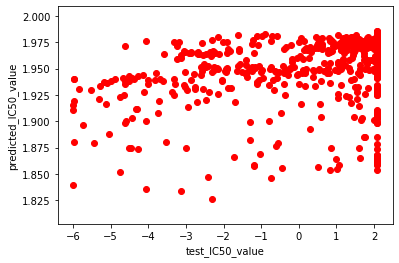

In [20]:
# plotting
plt.scatter(test_label_array,predicted_value,c='red')
plt.xlabel('test_IC50_value')
plt.ylabel('predicted_IC50_value')
plt.savefig(workdir + '//200915_EYDC9K_SVR_plot.png')

In [21]:
# R-squared value
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

-0.27106810432132167


In [22]:
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.0064082905964677195, intercept=1.9526652582864623, rvalue=0.4395270528339505, pvalue=1.4391474998599427e-46, stderr=0.0004233385914959607)

In [23]:
# RMSE
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 2.224614484335254
